In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Loan_Dataset.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df1=pd.read_csv('Loan_Dataset.csv')

In [19]:
df1['Gender']=df['Gender'].fillna(value='Male',inplace=True)
df1['Married']=df['Married'].fillna(value='No',inplace=True)
df1.replace(to_replace = '3+', value = 4, inplace = True)
df1['Self_Employed']=df1['Self_Employed'].fillna(value='Yes',inplace=True)
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(value=360,inplace=True)
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mode())

In [20]:
df2=pd.read_csv('Loan_Dataset.csv')

In [22]:
cols=['Gender','Married','Self_Employed','Self_Employed']
for col in ['Gender', 'Married', 'Self_Employed','Credit_History']:
    most_frequent = df2[col].mode()[0]
    df2[col].fillna(most_frequent, inplace=True)

In [26]:

for col1 in ['LoanAmount', 'Loan_Amount_Term']:
    mean_value = df2[col1].median()
    df2[col1].fillna(mean_value, inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col2 in df2.columns:
    if df2[col2].dtype == 'object':
        df2[col2] = label_encoder.fit_transform(df2[col2])

In [28]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


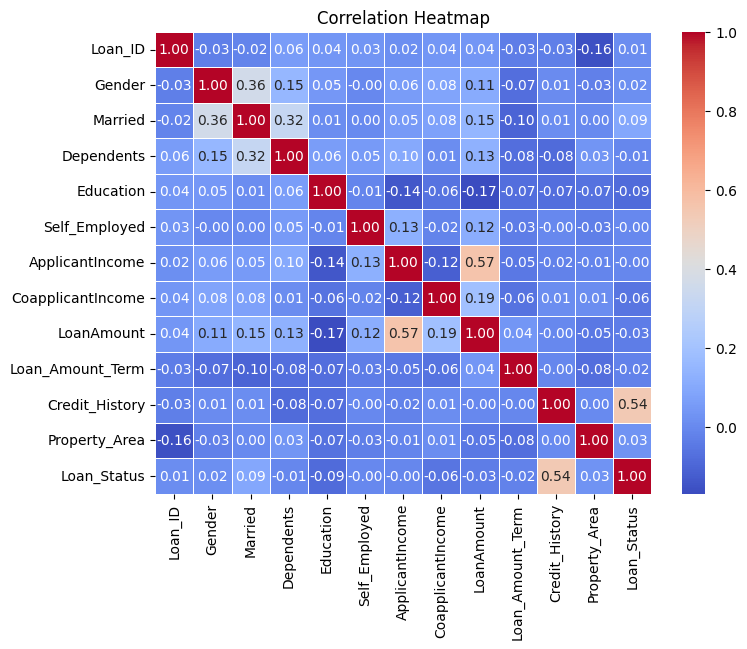

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df2.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()